**MULTI-ARM BANDIT with THOMPSON SAMPLING**

In [1]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

**Inital Setup**

Reward Probs = Probability of winning on a particular bandit/machine

a = no. of wins

b = no. of loss

initially we set a, b = 2, 2 for all the Machines. later we can subtract 2 from each machines.

In [2]:
reward_probs = [0.62, 0.05, 0.87, 0.49]
x = np.linspace(0, 1.0, 100)
a = [2, 2, 2, 2]
b = [2, 2, 2, 2]

**Beta-Distribution for all 4 Machines**

In [3]:
def calculate_y(x, a, b):
  y1 = beta.pdf(x, a[0], b[0])
  y2 = beta.pdf(x, a[1], b[1])
  y3 = beta.pdf(x, a[2], b[2])
  y4 = beta.pdf(x, a[3], b[3])
  return y1, y2, y3, y4

def texts(a, b):
  text1 = 'a='+ str(a[0])+','+'b='+str(b[0])
  text2 = 'a='+ str(a[1])+','+'b='+str(b[1])
  text3 = 'a='+ str(a[2])+','+'b='+str(b[2])
  text4 = 'a='+ str(a[3])+','+'b='+str(b[3])
  return text1, text2, text3, text4

**Plotting Beta-Distribution for all 4 Machines**

In [4]:
def beta_dist(x, a, b):

  y1, y2, y3, y4 = calculate_y(x, a, b)
  text1, text2, text3, text4 = texts(a, b)

  fig, ax = plt.subplots(2, 2)
  fig.set_figheight(8)
  fig.set_figwidth(12)

  ax[0, 0].plot(x, y1, 'r', label = 'a') 
  ax[0, 0].text(max(x)-0.2, max(y1)-0.1, text1, fontsize=10, color = 'black')
  ax[0, 0].set_title('Bandit I')

  ax[0, 1].plot(x, y2, 'b') 
  ax[0, 1].text(max(x)-0.2, max(y2)-0.1, text2, fontsize=10, color = 'black')
  ax[0, 1].set_title('Bandit II')

  ax[1, 0].plot(x, y3, 'g') 
  ax[1, 0].text(max(x)-0.2, max(y3)-0.1, text3, fontsize=10, color = 'black')
  ax[1, 0].set_title('Bandit III')

  ax[1, 1].plot(x, y4, 'k')
  ax[1, 1].text(max(x)-0.2, max(y4)-0.1, text4, fontsize=10, color = 'black')
  ax[1, 1].set_title('Bandit IV')

  plt.legend()
  plt.show()

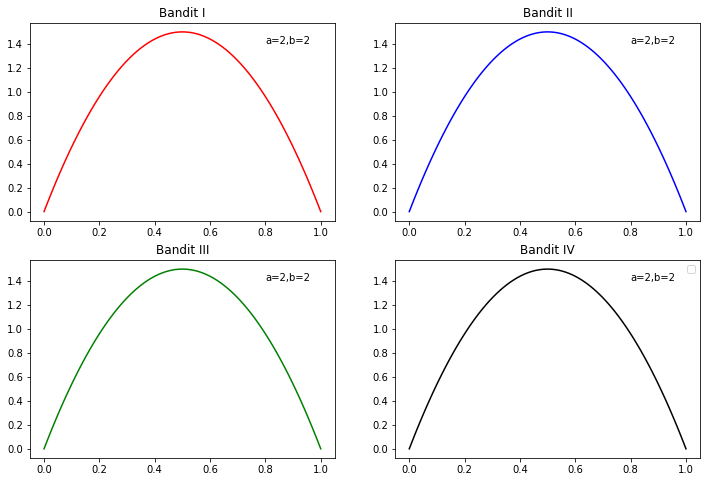

In [5]:
beta_dist(x, a, b)

As we can see the beta distribution is symmetrical for all the 4 machines before starting the game. Which means probability of choosing a machine is equal.

**Sampling from a Beta Distribution**

Step 1 => we sample 1 datapoint from each distribution

Step 2 => choose the Machine which gives highest probability and play

Step 3 => if we win, we assign a = a+1 else b = b+1

In [6]:
def argmax(lst):
  return lst.index(max(lst))

def beta_sampling(a, b):
  sample1 = round(np.random.beta(a[0], b[0], size=1)[0], 3)
  sample2 = round(np.random.beta(a[1], b[1], size=1)[0], 3)
  sample3 = round(np.random.beta(a[2], b[2], size=1)[0], 3)
  sample4 = round(np.random.beta(a[3], b[3], size=1)[0], 3)
  samples = [sample1, sample2, sample3, sample4]
  return samples

def agent(probs, reward_probs, ag_max, a, b):
  if probs<reward_probs[ag_max]:
    a[ag_max] = a[ag_max]+1
    reward = 1
  else:
    b[ag_max] = b[ag_max]+1
    reward = 0
  return a, b, reward

In [7]:
a = [2, 2, 2, 2]
b = [2, 2, 2, 2]

get_samples = beta_sampling(a, b)
ag_max = argmax(get_samples)
probs = max(get_samples)
a, b, reward = agent(probs, reward_probs, ag_max, a, b)

In [8]:
print('Probs:', get_samples)
print('We will play on Machine:', ag_max)
if reward>0:
  print('and we WON, so we increment a by 1 for Machine:', ag_max)
else:
  print('and we LOST, so we increment b by 1 for Machine:', ag_max)
print('a:', a)
print('b:', b)

Probs: [0.858, 0.034, 0.3, 0.803]
We will play on Machine: 0
and we LOST, so we increment b by 1 for Machine: 0
a: [2, 2, 2, 2]
b: [3, 2, 2, 2]


**Simulating for 500 times**

In [9]:
a = [2, 2, 2, 2]
b = [2, 2, 2, 2]
cum_reward = [0]
cum_reward_list = [0]

for j in range(0, 500):
  get_samples = beta_sampling(a, b)
  ag_max = argmax(get_samples)
  probs = max(get_samples)
  a, b, reward = agent(probs, reward_probs, ag_max, a, b)
  cum_reward.append(reward)
  c = sum(cum_reward)/len(cum_reward)
  cum_reward_list.append(c)

In [10]:
a, b

([5, 2, 418, 2], [8, 5, 70, 6])

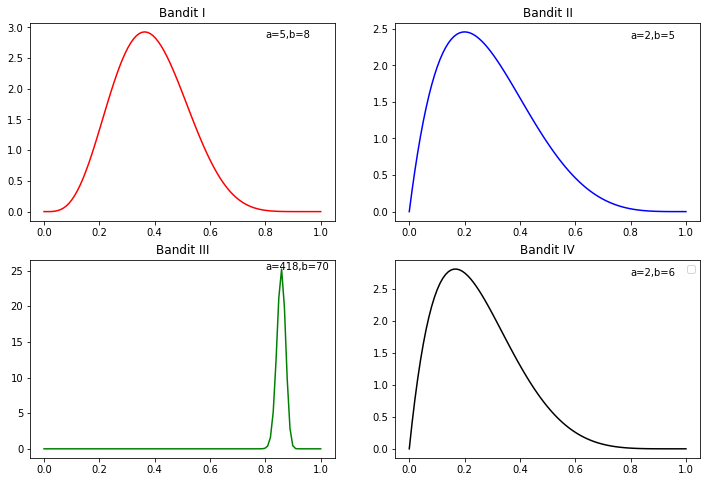

In [11]:
beta_dist(x, a, b)

In [12]:
a_new = [x-2 for x in a]
b_new = [x-2 for x in b]
print('no. of wins:', a_new[2])
print('no. of losses:', b_new[2])
print('success rate:', a_new[2]/500)

no. of wins: 416
no. of losses: 68
success rate: 0.832


In [13]:
arm_counts_thompson = [sum(x) for x in zip(a_new, b_new)]
arm_counts_thompson

[9, 3, 484, 4]

Text(0, 0.5, 'No. of times Arm was pulled')

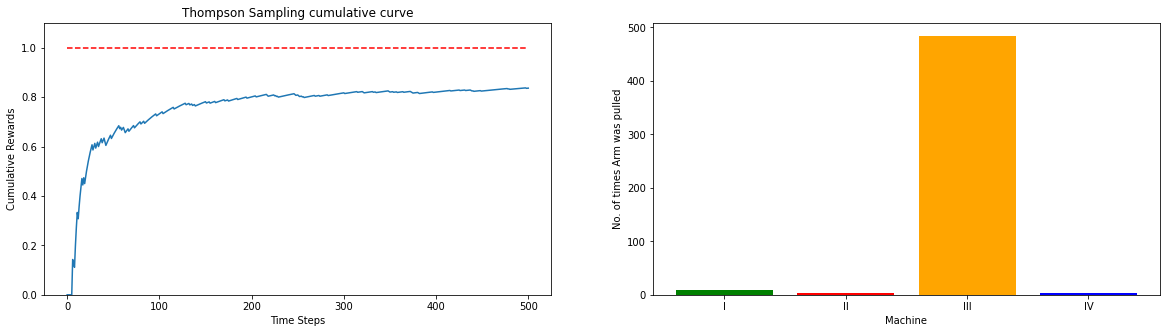

In [15]:
fig = plt.figure(figsize = [20, 5])


ax1 = fig.add_subplot(121)
ax1.plot(cum_reward_list)
ax1.hlines(1, 0, 500, color = 'red', linestyle = 'dashed')
ax1.set_ylim(0,1.1)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Thompson Sampling cumulative curve')

ax2 = fig.add_subplot(122)
ax2.bar(['I', 'II', 'III', 'IV'], arm_counts_thompson, color = ['green', 'red', 'orange', 'blue'])
ax2.set_xticks(['I', 'II', 'III', 'IV'])
ax2.set_xlabel('Machine')
ax2.set_ylabel('No. of times Arm was pulled')